In [1]:
import pandas as pd


df = pd.read_csv("last 5 y.csv", index_col="Date", parse_dates=True)
df.head(3)

,Unnamed: 0,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,...,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,latitude,max_fluctuations,kp_indices
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-04,1,1.0,4.35,2.24,11.02,2.11,-4.73,10.15,-1.58,-7.00,...,9.10,482.0,391.5,515.4,179360.0,55436.0,303319.0,-12.513441,16.142893,-0.021681
2019-05-06,3,2.0,4.01,2.73,5.13,1.84,-2.55,4.80,-2.31,-4.59,...,7.36,373.8,322.5,392.8,42878.0,12791.0,75843.0,-11.958191,16.142893,0.006081
2019-05-07,4,1.0,3.73,1.28,4.70,2.13,-1.02,3.94,-0.70,-4.21,...,11.02,351.9,327.4,382.2,29746.0,11704.0,55111.0,-13.178537,16.142893,-0.054936


In [2]:
df = df[df['Unnamed: 0']!=1616]
df.drop(['Unnamed: 0'] , axis = 1 , inplace = True)
df.tail()

,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,...,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,latitude,max_fluctuations,kp_indices
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-30,2.0,5.38,3.65,6.24,-2.76,-5.99,3.09,1.93,-3.04,4.55,...,6.76,420.3,392.8,465.6,84314.0,14896.0,365647.0,-34.945445,16.142893,-1.143282
2023-10-01,1.0,5.03,3.60,5.94,-2.80,-4.91,0.19,2.27,-3.57,4.95,...,6.12,413.7,395.0,432.8,201046.0,61828.0,374897.0,-2.380867,16.142893,0.484947
2023-10-03,1.0,7.58,5.56,8.60,-6.37,-7.91,1.71,1.70,-4.47,7.13,...,9.68,339.3,314.3,436.6,62372.0,10025.0,209472.0,-13.194437,16.142893,-0.055731
2023-10-04,1.0,7.82,5.73,9.41,-3.49,-7.42,1.88,5.80,-1.07,8.87,...,7.22,407.1,328.4,474.4,121306.0,6533.0,464060.0,-14.981607,16.142893,-0.145090
2023-10-05,1.0,4.36,2.17,7.49,0.30,-4.48,4.09,1.79,-4.80,4.98,...,13.25,453.0,428.9,490.0,176874.0,67577.0,242981.0,-33.097522,16.142893,-1.050885


array([[<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>]], dtype=object)

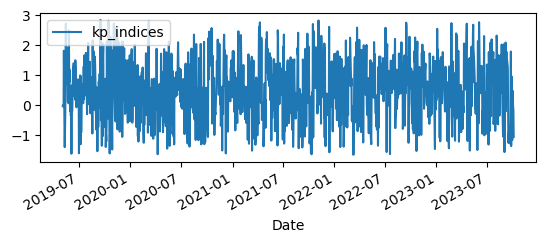

In [3]:
df[["kp_indices"]].plot(subplots=True, layout=(2,1))

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]


train_arima = train_data['kp_indices']
test_arima = test_data['kp_indices']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

In [5]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

In [6]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 1.550356193518471
MAE: 0.9771330521753908
RMSE: 1.245133002340903


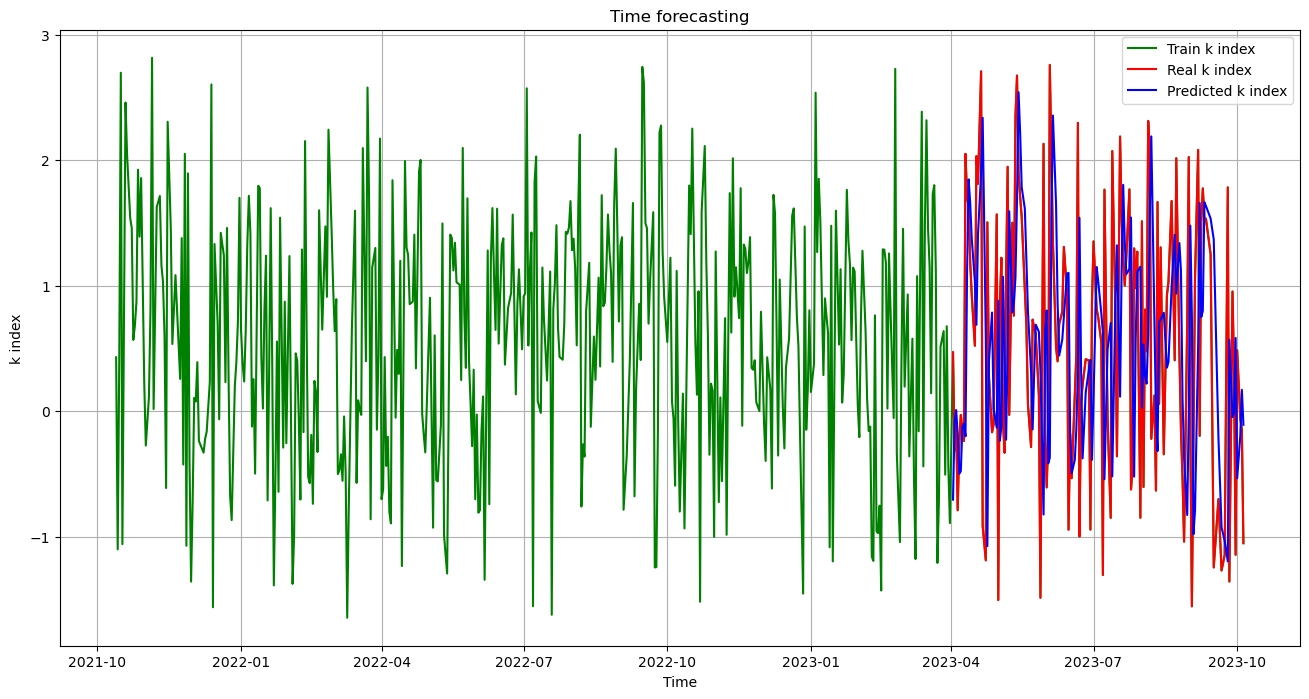

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df.index[-600:], df['kp_indices'].tail(600), color='green', label = 'Train k index')
plt.plot(test_data.index, y, color = 'red', label = 'Real k index')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted k index')
plt.title('Time forecasting')
plt.xlabel('Time')
plt.ylabel('k index')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()